In [147]:
import geopandas as gpd
import pandas as pd
import rioxarray as rxr
import numpy as np
from shapely.geometry import Polygon

In [151]:
footprint_df = gpd.read_file('/Users/jkim/code/spec_school/data/footprintData/90percent_flux.shp')

In [152]:
footprint_df

,Domain,SiteID,Type,Distance,Bearing,geometry
0,16,ABBY,major,210,130,"LINESTRING (-122.33035 45.76244, -122.32828 45..."
1,16,ABBY,major,210,190,"LINESTRING (-122.33035 45.76244, -122.33084 45..."
2,1,BART,major,530,280,"LINESTRING (-71.28731 44.06388, -71.29385 44.0..."
3,1,BART,major,530,335,"LINESTRING (-71.28731 44.06388, -71.29027 44.0..."
4,1,BART,secondary,530,140,"LINESTRING (-71.28731 44.06388, -71.28292 44.0..."
...,...,...,...,...,...,...
148,12,YELL,secondary,330,355,"LINESTRING (-110.53914 44.95348, -110.53948 44..."
149,15,ONAQ,major,590,260,"LINESTRING (-112.45244 40.17759, -112.45926 40..."
150,15,ONAQ,major,590,170,"LINESTRING (-112.45244 40.17759, -112.45124 40..."
151,5,UNDE,major,580,110,"LINESTRING (-89.53725 46.23388, -89.53011 46.2..."


In [153]:
sites = ['MLBS', 'GRSM', 'ORNL']
polygons = []
sites2 = ['GRSM']

In [154]:
for site in sites:
    footprint_ = footprint_df[(footprint_df.SiteID == site) & (footprint_df.Type == "major")]
    coords = footprint_.geometry.get_coordinates().sort_values('y')
    coords = coords.drop_duplicates()
    xc = coords.x.values
    yc = coords.y.values

    xc = np.append(xc, xc[0])
    yc = np.append(yc, yc[0])
    polygons.append(Polygon(list(zip(xc, yc))))

In [156]:
flux_footprints = gpd.GeoDataFrame(data=sites, geometry=polygons, columns=['sitename'], crs=footprint_df.crs)

In [157]:
flux_footprints.to_file('/Users/jkim/code/spec_school/data/footprintData/basic_footprint.shp')

<Axes: >

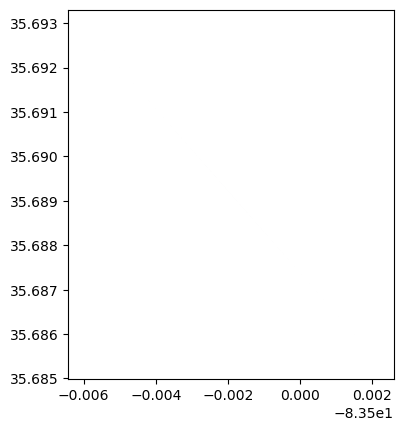

In [143]:
flux_footprints.iloc[[0]].plot()

In [145]:
footprint_df[(footprint_df.SiteID == 'MLBS') & (footprint_df.Type == "major")]

,Domain,SiteID,Type,Distance,Bearing,geometry
64,7,MLBS,major,550,250,"LINESTRING (-80.52484 37.37828, -80.53069 37.3..."
65,7,MLBS,major,550,315,"LINESTRING (-80.52484 37.37828, -80.52921 37.3..."


<Axes: >

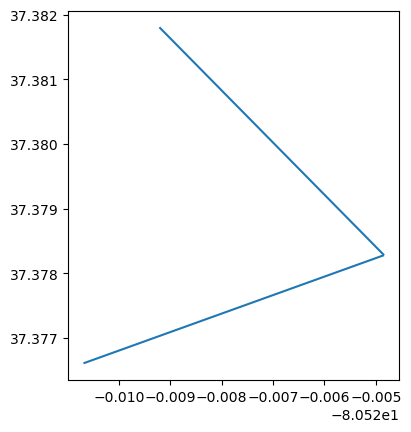

In [148]:
footprint_df[(footprint_df.SiteID == 'MLBS') & (footprint_df.Type == "major")].plot()

<Axes: >

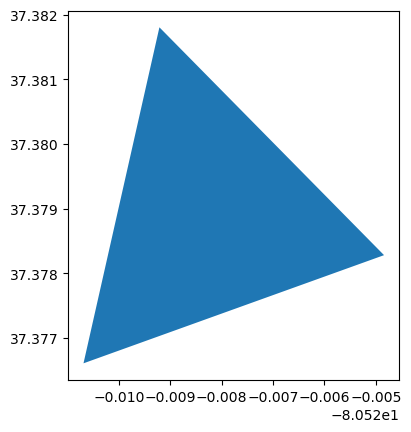

In [159]:
flux_footprints.iloc[[0]].plot()